In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tf_util.tf_util import gumbel_softmax_log_density
from tf_util.tf_util import gumbel_softmax_trick
from tf_util.stat_util import sample_gumbel
import tensorflow_probability as tfp


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [48]:
M = 1000
K = 10
_G = np.expand_dims(sample_gumbel(M, K), 0)

G = tf.placeholder(tf.float64, (1,M,K))
alpha = tf.placeholder(tf.float64, (K,))
tau = 0.03

C = gumbel_softmax_trick(G, alpha, tau)

log_p_C = gumbel_softmax_log_density(K, C, alpha, tau)


In [49]:
sess = tf.Session()

In [50]:
_alpha = np.random.uniform(0.0, 1.0, (K,))
_alpha = _alpha / np.sum(_alpha)

In [51]:
_C, _log_p_C = sess.run([C, log_p_C], {alpha:_alpha, G:_G})

[0.12315759 0.13596303 0.02017984 0.05539029 0.14419389 0.00983256
 0.14307112 0.13462561 0.09660311 0.13698297]


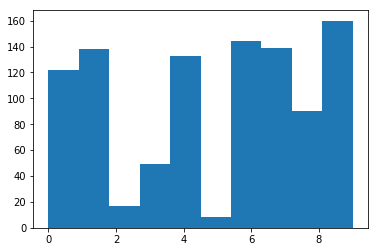

mult entropy 2.1391756610777755
Gumbel entropy -813.1480918923259


In [52]:
print(_alpha)
plt.figure()
plt.hist(np.argmax(_C, 1))
plt.show()
print('mult entropy', np.sum(-np.log(_alpha)*_alpha))
print('Gumbel entropy', np.mean(-_log_p_C))

In [53]:
dist = tfp.distributions.RelaxedOneHotCategorical(tau, alpha)

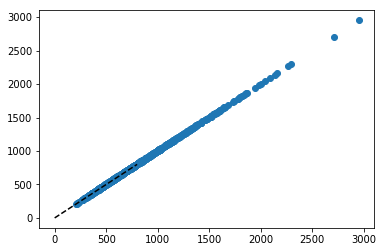

tf entropy -808.8174810259338
sean gumbel entropy -813.1480918923259


In [54]:
_log_p_C_tf = sess.run(dist.log_prob(C), {alpha:_alpha, G:_G})
plt.figure()
plt.scatter(_log_p_C_tf, _log_p_C)
plt.plot([0, 800], [0, 800], 'k--')
plt.show()
print('tf entropy', np.mean(-_log_p_C_tf))
print('sean gumbel entropy', np.mean(-_log_p_C))